# Data422 Group Project

# The A+ team
Jacob Reid Mr. T (JRE141 - 47369324) <br/> 
Rick (Mengyao Liu) John "Hannibal" Smith (MLI181 - 43416446) <br/>
Katie (Jinghang Liu) Amy Amanda "Triple A" Allen (JLI3971 - 11854129) <br/>

1. Trend of the crash according to year.

In [20]:
required_packages <- c("tidyverse", "readr", "skimr", "visdat")

for (packageName in required_packages){
if (!requireNamespace(packageName, quietly = TRUE)) {
  install.packages(packageName)
}
}

In [21]:
# load library
library(tidyverse)
library(readr)
library(skimr)
library(visdat)

__Create Prices RDA__

In [22]:
gas <- read_csv(file = "./Datasets/Energy_Weekly_fuel_prices_Apr_2004Jul_2023.csv") 
gas

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details, e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 31093 Columns: 8
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): Week number, Fuel price measure, Value Unit, Value Label, Metadata 1
dbl  (1): Value
lgl  (1): Null Reason
date (1): Week

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Week number,Week,Fuel price measure,Value,Value Unit,Value Label,Null Reason,Metadata 1
<chr>,<date>,<chr>,<dbl>,<chr>,<chr>,<lgl>,<chr>
2004w17,2004-04-23,Dubai crude (USD),32.10000,usd,USD per barrel,NA,NA
2004w17,2004-04-23,NZ US exchange rate,0.63300,usd,USD per 1 NZD,NA,NA
2004w17,2004-04-23,Dubai crude (NZD),50.74000,nzd,NZD per barrel,NA,NA
2004w17,2004-04-23,Diesel importer cost,43.40000,nzd,NZ cents per litre,NA,NA
2004w17,2004-04-23,Diesel Emission Trading Scheme levy,0.00000,nzd,NZ cents per litre,NA,NA
2004w17,2004-04-23,Diesel GST,7.50000,nzd,NZ cents per litre,NA,NA
2004w17,2004-04-23,Diesel taxes,7.90000,nzd,NZ cents per litre,NA,NA
2004w17,2004-04-23,Diesel price excluding taxes,59.60000,nzd,NZ cents per litre,NA,NA
2004w17,2004-04-23,Diesel main port price,67.50000,nzd,NZ cents per litre,NA,NA


In [23]:
data <- gas %>%
    select(c(Week, "Fuel price measure", Value, "Value Unit"))

In [24]:
taxes <- data %>%
  filter(grepl("taxes", gas$"Fuel price measure", ignore.case = TRUE))
taxes

Week,Fuel price measure,Value,Value Unit
<date>,<chr>,<dbl>,<chr>
2004-04-23,Diesel taxes,7.90000,nzd
2004-04-23,Diesel price excluding taxes,59.60000,nzd
2004-04-23,Regular petrol taxes,54.70000,nzd
2004-04-23,Regular petrol price excluding taxes,59.80000,nzd
2004-04-23,Premium petrol 95R taxes,55.06500,nzd
2004-04-23,Premium petrol 95R price excluding taxes,62.83500,nzd
2004-04-23,Diesel main port price excluding taxes,59.60000,nzd
2004-04-30,Diesel taxes,7.70000,nzd
2004-04-30,Diesel price excluding taxes,58.30000,nzd


In [25]:
excluding_taxes <- data %>%
  filter(grepl("excluding taxes", gas$"Fuel price measure", ignore.case = TRUE))
excluding_taxes

Week,Fuel price measure,Value,Value Unit
<date>,<chr>,<dbl>,<chr>
2004-04-23,Diesel price excluding taxes,59.60000,nzd
2004-04-23,Regular petrol price excluding taxes,59.80000,nzd
2004-04-23,Premium petrol 95R price excluding taxes,62.83500,nzd
2004-04-23,Diesel main port price excluding taxes,59.60000,nzd
2004-04-30,Diesel price excluding taxes,58.30000,nzd
2004-04-30,Regular petrol price excluding taxes,58.50000,nzd
2004-04-30,Premium petrol 95R price excluding taxes,65.50167,nzd
2004-04-30,Diesel main port price excluding taxes,58.30000,nzd
2004-05-07,Diesel price excluding taxes,62.20000,nzd


In [26]:
filtered_data <- excluding_taxes %>%
  filter(`Fuel price measure` != "Diesel main port price excluding taxes")
filtered_data

Week,Fuel price measure,Value,Value Unit
<date>,<chr>,<dbl>,<chr>
2004-04-23,Diesel price excluding taxes,59.60000,nzd
2004-04-23,Regular petrol price excluding taxes,59.80000,nzd
2004-04-23,Premium petrol 95R price excluding taxes,62.83500,nzd
2004-04-30,Diesel price excluding taxes,58.30000,nzd
2004-04-30,Regular petrol price excluding taxes,58.50000,nzd
2004-04-30,Premium petrol 95R price excluding taxes,65.50167,nzd
2004-05-07,Diesel price excluding taxes,62.20000,nzd
2004-05-07,Regular petrol price excluding taxes,62.30000,nzd
2004-05-07,Premium petrol 95R price excluding taxes,70.83500,nzd


In [27]:
filtered_data$`Fuel price measure` <- gsub("excluding taxes", "", filtered_data$`Fuel price measure`)
filtered_data

Week,Fuel price measure,Value,Value Unit
<date>,<chr>,<dbl>,<chr>
2004-04-23,Diesel price,59.60000,nzd
2004-04-23,Regular petrol price,59.80000,nzd
2004-04-23,Premium petrol 95R price,62.83500,nzd
2004-04-30,Diesel price,58.30000,nzd
2004-04-30,Regular petrol price,58.50000,nzd
2004-04-30,Premium petrol 95R price,65.50167,nzd
2004-05-07,Diesel price,62.20000,nzd
2004-05-07,Regular petrol price,62.30000,nzd
2004-05-07,Premium petrol 95R price,70.83500,nzd


In [28]:
result <- anti_join(taxes, excluding_taxes)
result

Joining with `by = join_by(Week, `Fuel price measure`, Value, `Value Unit`)`


Week,Fuel price measure,Value,Value Unit
<date>,<chr>,<dbl>,<chr>
2004-04-23,Diesel taxes,7.90000,nzd
2004-04-23,Regular petrol taxes,54.70000,nzd
2004-04-23,Premium petrol 95R taxes,55.06500,nzd
2004-04-30,Diesel taxes,7.70000,nzd
2004-04-30,Regular petrol taxes,54.50000,nzd
2004-04-30,Premium petrol 95R taxes,55.39833,nzd
2004-05-07,Diesel taxes,8.20000,nzd
2004-05-07,Regular petrol taxes,55.00000,nzd
2004-05-07,Premium petrol 95R taxes,56.06500,nzd


In [29]:
result$Value <- round(result$Value, 3)
result

Week,Fuel price measure,Value,Value Unit
<date>,<chr>,<dbl>,<chr>
2004-04-23,Diesel taxes,7.900,nzd
2004-04-23,Regular petrol taxes,54.700,nzd
2004-04-23,Premium petrol 95R taxes,55.065,nzd
2004-04-30,Diesel taxes,7.700,nzd
2004-04-30,Regular petrol taxes,54.500,nzd
2004-04-30,Premium petrol 95R taxes,55.398,nzd
2004-05-07,Diesel taxes,8.200,nzd
2004-05-07,Regular petrol taxes,55.000,nzd
2004-05-07,Premium petrol 95R taxes,56.065,nzd


In [30]:
result$`Fuel price measure` <- gsub("taxes", "", result$`Fuel price measure`)
result

Week,Fuel price measure,Value,Value Unit
<date>,<chr>,<dbl>,<chr>
2004-04-23,Diesel,7.900,nzd
2004-04-23,Regular petrol,54.700,nzd
2004-04-23,Premium petrol 95R,55.065,nzd
2004-04-30,Diesel,7.700,nzd
2004-04-30,Regular petrol,54.500,nzd
2004-04-30,Premium petrol 95R,55.398,nzd
2004-05-07,Diesel,8.200,nzd
2004-05-07,Regular petrol,55.000,nzd
2004-05-07,Premium petrol 95R,56.065,nzd


In [31]:
nrow(result)
nrow(filtered_data)

[1] 3009

[1] 3009

In [32]:
str(result)
str(filtered_data)

tibble [3,009 × 4] (S3: tbl_df/tbl/data.frame)
 $ Week              : Date[1:3009], format: "2004-04-23" "2004-04-23" ...
 $ Fuel price measure: chr [1:3009] "Diesel " "Regular petrol " "Premium petrol 95R " "Diesel " ...
 $ Value             : num [1:3009] 7.9 54.7 55.1 7.7 54.5 ...
 $ Value Unit        : chr [1:3009] "nzd" "nzd" "nzd" "nzd" ...
tibble [3,009 × 4] (S3: tbl_df/tbl/data.frame)
 $ Week              : Date[1:3009], format: "2004-04-23" "2004-04-23" ...
 $ Fuel price measure: chr [1:3009] "Diesel price " "Regular petrol price " "Premium petrol 95R price " "Diesel price " ...
 $ Value             : num [1:3009] 59.6 59.8 62.8 58.3 58.5 ...
 $ Value Unit        : chr [1:3009] "nzd" "nzd" "nzd" "nzd" ...


In [33]:
price <- data.frame(
  Week = result$Week,
  Fuel = filtered_data$"Fuel price measure",
  Value = result$Value + filtered_data$Value,
  Unit = filtered_data$`Value Unit`
)
price

Week,Fuel,Value,Unit
<date>,<chr>,<dbl>,<chr>
2004-04-23,Diesel price,67.5000,nzd
2004-04-23,Regular petrol price,114.5000,nzd
2004-04-23,Premium petrol 95R price,117.9000,nzd
2004-04-30,Diesel price,66.0000,nzd
2004-04-30,Regular petrol price,113.0000,nzd
2004-04-30,Premium petrol 95R price,120.8997,nzd
2004-05-07,Diesel price,70.4000,nzd
2004-05-07,Regular petrol price,117.3000,nzd
2004-05-07,Premium petrol 95R price,126.9000,nzd


In [34]:
save(price,file="./Datasets/price.rda")

In [35]:
#check the dataset
car <- read_csv("./Datasets/CarTypes.csv", skip = 1)

New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...19`
Rows: 15 Columns: 19
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (12): ...1, ...2, ...3, ...4, ...5, ...6, Fuel cost per litre, Differenc...
dbl  (5): Tank size 2023 (L), 2,013, 2,023, 2013 fills, 2023 fills
num  (2): 2013 range, 2023 range

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [36]:
car %>% glimpse()

Rows: 15
Columns: 19
$ ...1                         <chr> "Toyota", "Toyota", "Ford", "Mitsubishi",…
$ ...2                         <chr> "RAV4", "Corolla", "Ranger", "Triton", "S…
$ ...3                         <chr> "2WD 2.5L Hybrid", "Ascent Sport Hybrid",…
$ ...4                         <chr> "Hybrid", "Hatchback", "Ute", "Ute", "SUV…
$ ...5                         <chr> "Hybrid", "Hybrid", "Diesel", "Diesel", "…
$ ...6                         <chr> "91", "91", "Diesel", "Diesel", "91", "91…
$ `Fuel cost per litre`        <chr> "$2.36", "$2.36", "$1.88", "$1.88", "$2.3…
$ `Tank size 2023 (L)`         <dbl> 55, 50, 80, 75, 54, 50, 40, 37, 80, 76, 5…
$ `2,013`                      <dbl> 8, 7, 10, 10, 9, 7, 7, 6, 8, 8, 2, 6, 7, …
$ `2,023`                      <dbl> 5, 4, 8, 9, 8, 6, 6, 5, 7, 7, 2, 6, 6, 7,…
$ `Difference 2013-2023`       <chr> "4", "3", "2", "1", "1", "1", "1", "1", "…
$ `2013 range`                 <dbl> 655, 758, 816, 758, 621, 694, 606, 673, 9…
$ `2023 range`     

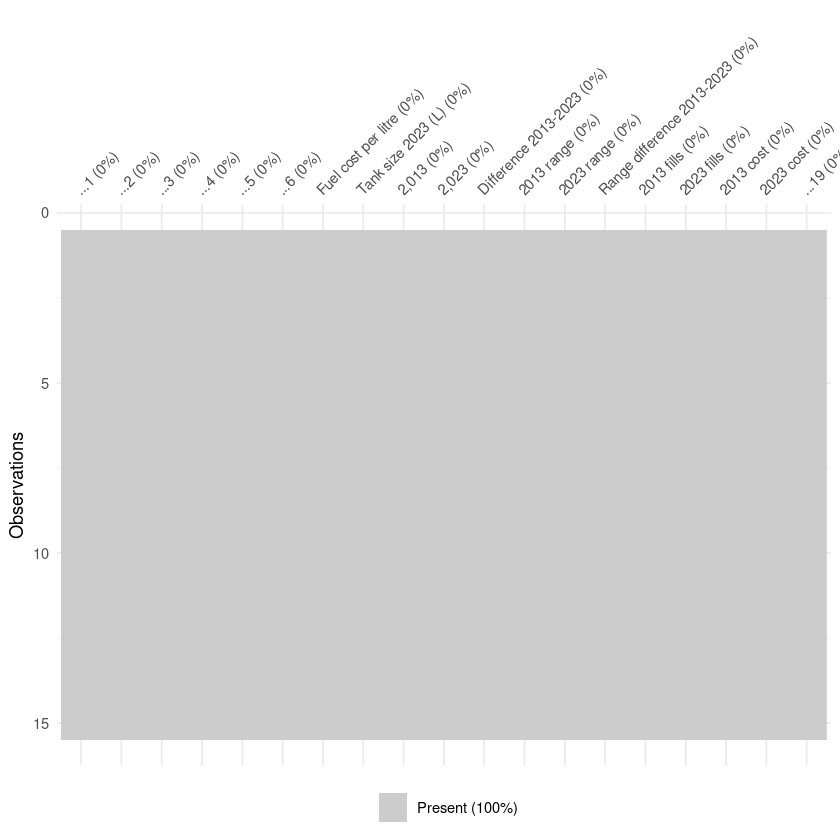

In [37]:
car %>% vis_miss()

In [38]:
car2 <- car %>%
rename(Brand = ...1,Model = ...2,Type = ...3,Engine = ...4,
       FuelType = ...5, FuelCost = ...6,costdifference = ...19,TankSize =`Tank size 2023 (L)`)
car2$FuelCost[car2$FuelCost == "91"] <- "Regular_Petrol"
car2$FuelCost[car2$FuelCost == "95"] <- "Premium_Petrol_95R"
car2

Brand,Model,Type,Engine,FuelType,FuelCost,Fuel cost per litre,TankSize,"2,013","2,023",Difference 2013-2023,2013 range,2023 range,Range difference 2013-2023,2013 fills,2023 fills,2013 cost,2023 cost,costdifference
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Toyota,RAV4,2WD 2.5L Hybrid,Hybrid,Hybrid,Regular_Petrol,$2.36,55,8,5,4,655,1170,515,16,9,"$ 2,076.80","$ 1,168.20",$ 908.60
Toyota,Corolla,Ascent Sport Hybrid,Hatchback,Hybrid,Regular_Petrol,$2.36,50,7,4,3,758,1250,492,14,8,"$ 1,652.00",$ 944.00,$ 708.00
Ford,Ranger,XL 2.0L 6x2 Hi-Rider Double Cab,Ute,Diesel,Diesel,$1.88,80,10,8,2,816,1053,236,13,10,"$ 1,955.20","$ 1,504.00",$ 451.20
Mitsubishi,Triton,GLX 4WD Auto,Ute,Diesel,Diesel,$1.88,75,10,9,1,758,872,115,14,12,"$ 1,974.00","$ 1,692.00",$ 282.00
Kia,Sportage,S Petrol Manual,SUV,Petrol,Regular_Petrol,$2.36,54,9,8,1,621,701,81,17,15,"$ 2,166.48","$ 1,911.60",$ 254.88
Hyundai,Kona,Smartstream G2.0 Atkinson,Hatchback,Petrol,Regular_Petrol,$2.36,50,7,6,1,694,806,112,15,13,"$ 1,770.00","$ 1,534.00",$ 236.00
Honda,Jazz,Crosstar 1.5L Auto,Hatchback,Petrol,Regular_Petrol,$2.36,40,7,6,1,606,690,84,17,15,"$ 1,604.80","$ 1,416.00",$ 188.80
Suzuki,Swift,GL Manual,Hatchback,Petrol,Regular_Petrol,$2.36,37,6,5,1,673,804,132,15,13,"$ 1,309.80","$ 1,135.16",$ 174.64
Toyota,HiLux,Single-Cab WorkMate,Ute,Diesel,Diesel,$1.88,80,8,7,1,988,1081,93,11,10,"$ 1,654.40","$ 1,504.00",$ 150.40


In [39]:
load(file = "./Datasets/prices_long.rda")

In [40]:
ls()

[1] "car"               "car2"              "data"             
 [4] "excluding_taxes"   "filtered_data"     "gas"              
 [7] "new_df"            "packageName"       "price"            
[10] "required_packages" "result"            "taxes"

In [41]:
fuelprice <- new_df %>% gather(key = FuelCost,
         value = price,-Year)

In [42]:
fuelprice

Year,FuelCost,price
<chr>,<chr>,<dbl>
2004,Diesel,0.6600000
2005,Diesel,0.7350000
2006,Diesel,0.9790000
2007,Diesel,0.9130000
2008,Diesel,1.0730000
2009,Diesel,0.9630000
2010,Diesel,1.0510000
2011,Diesel,1.2850807
2012,Diesel,1.3866702


In [43]:
combined <- car2 %>% select(Brand,Model,FuelCost,TankSize )
combined$Fuelefficiency <- rowMeans(car2[, c("2,013", "2,023")])
combined 

Brand,Model,FuelCost,TankSize,Fuelefficiency
<chr>,<chr>,<chr>,<dbl>,<dbl>
Toyota,RAV4,Regular_Petrol,55,6.5
Toyota,Corolla,Regular_Petrol,50,5.5
Ford,Ranger,Diesel,80,9.0
Mitsubishi,Triton,Diesel,75,9.5
Kia,Sportage,Regular_Petrol,54,8.5
Hyundai,Kona,Regular_Petrol,50,6.5
Honda,Jazz,Regular_Petrol,40,6.5
Suzuki,Swift,Regular_Petrol,37,5.5
Toyota,HiLux,Diesel,80,7.5


In [44]:
combinedfinal <- left_join(fuelprice, combined, by = "FuelCost",multiple = "all")

Warning message in left_join(fuelprice, combined, by = "FuelCost", multiple = "all"):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 3 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship = "many-to-many"` to silence this warning.”


In [45]:
combinedfinal

Year,FuelCost,price,Brand,Model,TankSize,Fuelefficiency
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
2004,Diesel,0.660,Ford,Ranger,80,9.0
2004,Diesel,0.660,Mitsubishi,Triton,75,9.5
2004,Diesel,0.660,Toyota,HiLux,80,7.5
2004,Diesel,0.660,Isuzu,D-Max,76,7.5
2004,Diesel,0.660,Hyundai,Santa Fe,67,6.5
2005,Diesel,0.735,Ford,Ranger,80,9.0
2005,Diesel,0.735,Mitsubishi,Triton,75,9.5
2005,Diesel,0.735,Toyota,HiLux,80,7.5
2005,Diesel,0.735,Isuzu,D-Max,76,7.5


In [46]:
set.seed(1)
combinedfinal <- combinedfinal %>%
  rowwise() %>% 
  mutate(
    Range = rnorm(1, mean = TankSize / Fuelefficiency * 100, sd = 50),
    KM_10vehicles_26refuels = 10 * Range * 26,
    FuelCosts_10vehicles = 10 * TankSize * 26 * price
  ) %>%
  ungroup()


In [47]:
combinedfinal

Year,FuelCost,price,Brand,Model,TankSize,Fuelefficiency,Range,KM_10vehicles_26refuels,FuelCosts_10vehicles
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2004,Diesel,0.660,Ford,Ranger,80,9.0,857.5662,222967.2,13728.00
2004,Diesel,0.660,Mitsubishi,Triton,75,9.5,798.6559,207650.5,12870.00
2004,Diesel,0.660,Toyota,HiLux,80,7.5,1024.8852,266470.2,13728.00
2004,Diesel,0.660,Isuzu,D-Max,76,7.5,1093.0974,284205.3,13041.60
2004,Diesel,0.660,Hyundai,Santa Fe,67,6.5,1047.2446,272283.6,11497.20
2005,Diesel,0.735,Ford,Ranger,80,9.0,847.8655,220445.0,15288.00
2005,Diesel,0.735,Mitsubishi,Triton,75,9.5,813.8451,211599.7,14332.50
2005,Diesel,0.735,Toyota,HiLux,80,7.5,1103.5829,286931.6,15288.00
2005,Diesel,0.735,Isuzu,D-Max,76,7.5,1042.1224,270951.8,14523.60


In [48]:
save(file="./Datasets/combinedfinal.rda", combinedfinal)

In [49]:
carfuel <- combinedfinal %>%
    mutate(kmperdollar = KM_10vehicles_26refuels / FuelCosts_10vehicles) %>%
    rename(FuelType = FuelCost)

In [50]:
carfuel

Year,FuelType,price,Brand,Model,TankSize,Fuelefficiency,Range,KM_10vehicles_26refuels,FuelCosts_10vehicles,kmperdollar
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2004,Diesel,0.660,Ford,Ranger,80,9.0,857.5662,222967.2,13728.00,16.24178
2004,Diesel,0.660,Mitsubishi,Triton,75,9.5,798.6559,207650.5,12870.00,16.13446
2004,Diesel,0.660,Toyota,HiLux,80,7.5,1024.8852,266470.2,13728.00,19.41071
2004,Diesel,0.660,Isuzu,D-Max,76,7.5,1093.0974,284205.3,13041.60,21.79221
2004,Diesel,0.660,Hyundai,Santa Fe,67,6.5,1047.2446,272283.6,11497.20,23.68260
2005,Diesel,0.735,Ford,Ranger,80,9.0,847.8655,220445.0,15288.00,14.41948
2005,Diesel,0.735,Mitsubishi,Triton,75,9.5,813.8451,211599.7,14332.50,14.76363
2005,Diesel,0.735,Toyota,HiLux,80,7.5,1103.5829,286931.6,15288.00,18.76842
2005,Diesel,0.735,Isuzu,D-Max,76,7.5,1042.1224,270951.8,14523.60,18.65597


In [51]:
#library(CSV)

In [52]:
write.csv(carfuel, "./Datasets/carfuel.csv")


In [53]:
carfuel_new <- read_csv("./Datasets/carfuel.csv", skip = 1)

Rows: 299 Columns: 12
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Diesel, Ford, Ranger
dbl (9): 1, 2004, 0.66, 80, 9, 857.566198351772, 222967.211571461, 13728, 16...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [54]:
carfuel_new

1,2004,Diesel,0.66,Ford,Ranger,80,9,857.566198351772,222967.211571461,13728,16.2417840596927
<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,2004,Diesel,0.660,Mitsubishi,Triton,75,9.5,798.6559,207650.5,12870.00,16.13446
3,2004,Diesel,0.660,Toyota,HiLux,80,7.5,1024.8852,266470.2,13728.00,19.41071
4,2004,Diesel,0.660,Isuzu,D-Max,76,7.5,1093.0974,284205.3,13041.60,21.79221
5,2004,Diesel,0.660,Hyundai,Santa Fe,67,6.5,1047.2446,272283.6,11497.20,23.68260
6,2005,Diesel,0.735,Ford,Ranger,80,9.0,847.8655,220445.0,15288.00,14.41948
7,2005,Diesel,0.735,Mitsubishi,Triton,75,9.5,813.8451,211599.7,14332.50,14.76363
8,2005,Diesel,0.735,Toyota,HiLux,80,7.5,1103.5829,286931.6,15288.00,18.76842
9,2005,Diesel,0.735,Isuzu,D-Max,76,7.5,1042.1224,270951.8,14523.60,18.65597
10,2005,Diesel,0.735,Hyundai,Santa Fe,67,6.5,1015.4998,264030.0,12803.70,20.62138
